In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import ssl

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
def sand_pix_deer(X, y, index):
    plt.figure(figsize = (15,4))
    plt.imshow(X[index])
    plt.xlabel(y[index])

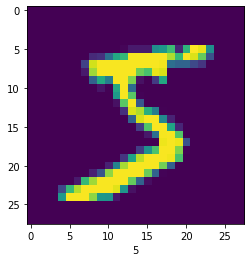

In [6]:
sand_pix_deer(X_train, y_train, 0)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
cnn = models.Sequential([
    layers.Conv2D(filters = 28, activation='relu', kernel_size=(3,3), input_shape = (28,28, 1)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 56, activation='relu', kernel_size=(3,3), input_shape = (28,28, 1)),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [9]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [10]:
cnn.fit(X_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2657 - accuracy: 0.9171
Epoch 2/2
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0679 - accuracy: 0.9797


In [11]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0563 - accuracy: 0.9812


[0.05632559955120087, 0.9811999797821045]

In [12]:
y_pred = cnn.predict(X_test)

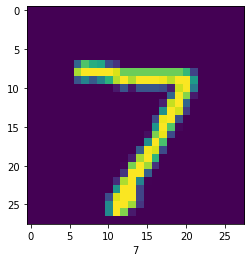

In [16]:
sand_pix_deer(X_test, y_test, 0)

In [15]:
np.argmax(y_pred[0])

7